In [1]:
#from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [2]:
zipcodes = gpd.read_file('../data/zipcodes_2.geojson')
print(zipcodes.crs)
zipcodes.head()

EPSG:4326


,zipcode,poname,created_date,objectid,globalid,created_user,last_edited_date,last_edited_user,geometry
0,37015,ASHLAND CITY,None,21,{2AB8F204-63EE-49A4-A806-8E1DAE1C32AA},None,None,None,"MULTIPOLYGON (((-86.88867 36.28013, -86.88867 ..."
1,37143,PEGRAM,None,23,{B142BE7A-6E4F-4325-95C5-A1C980D46F37},None,None,None,"MULTIPOLYGON (((-87.03553 36.08659, -87.03556 ..."
2,37072,GOODLETTSVILLE,None,46,{FD866D5C-A196-4C6E-9CFF-A04FD08B1657},None,None,None,"MULTIPOLYGON (((-86.76191 36.39867, -86.76200 ..."
3,37189,WHITES CREEK,None,50,{AD8029C0-DF92-4103-B4DF-A67EF4F502E1},None,None,None,"MULTIPOLYGON (((-86.84400 36.32689, -86.83591 ..."
4,37015,ASHLAND CITY,None,20,{49D81E1C-5F08-414E-AED7-8C8F9714DD83},None,None,None,"MULTIPOLYGON (((-86.92773 36.28074, -86.92769 ..."


In [3]:
type(zipcodes)

geopandas.geodataframe.GeoDataFrame

In [4]:
zipcodes = zipcodes[['zipcode','poname', 'geometry']]
zipcodes.head()

,zipcode,poname,geometry
0,37015,ASHLAND CITY,"MULTIPOLYGON (((-86.88867 36.28013, -86.88867 ..."
1,37143,PEGRAM,"MULTIPOLYGON (((-87.03553 36.08659, -87.03556 ..."
2,37072,GOODLETTSVILLE,"MULTIPOLYGON (((-86.76191 36.39867, -86.76200 ..."
3,37189,WHITES CREEK,"MULTIPOLYGON (((-86.84400 36.32689, -86.83591 ..."
4,37015,ASHLAND CITY,"MULTIPOLYGON (((-86.92773 36.28074, -86.92769 ..."


In [5]:
public_water = pd.read_csv('../data/water_csv.csv')
print(public_water.shape)
public_water.head(5)

(73, 10)


,the_geom,OBJECTID,LAT,NAME,LON,Location,Dog,FeatType,Cnt,ADA
0,POINT (-86.89425345576078 36.26250455840148),45921,-86.894253,Beaman Water Fountain,36.262505,NaN,Y,Fountain/Bottle filler/ADA,1,Y
1,POINT (-86.90622747033689 36.06089914863129),45937,-86.906227,Edwin Nature Center Water Fountain,36.060899,Restrooms Breezeway,N,Bottle Filler/ADA,1,Y
2,POINT (-86.86727565917963 36.08310102493863),45964,-86.867276,Percy Warner Belle Meade Gates Water Fountain,36.083101,Belle Meade Gates,Y,ADA Bowl,1,Y
3,POINT (-86.8637899391243 36.161795831166906),45992,-86.863790,West Park Water Fountain,36.161796,Ballfield,N,Single with foot pedal,1,N
4,POINT (-86.84589094125035 36.151393836128406),46012,-86.845891,Richland Park Water Fountain,36.151394,Playground,N,Single with foot pedal,1,N


In [6]:
public_water = public_water[['the_geom','NAME', 'Location','Dog','FeatType','ADA']]
print(public_water.shape)
public_water.head()

(73, 6)


,the_geom,NAME,Location,Dog,FeatType,ADA
0,POINT (-86.89425345576078 36.26250455840148),Beaman Water Fountain,NaN,Y,Fountain/Bottle filler/ADA,Y
1,POINT (-86.90622747033689 36.06089914863129),Edwin Nature Center Water Fountain,Restrooms Breezeway,N,Bottle Filler/ADA,Y
2,POINT (-86.86727565917963 36.08310102493863),Percy Warner Belle Meade Gates Water Fountain,Belle Meade Gates,Y,ADA Bowl,Y
3,POINT (-86.8637899391243 36.161795831166906),West Park Water Fountain,Ballfield,N,Single with foot pedal,N
4,POINT (-86.84589094125035 36.151393836128406),Richland Park Water Fountain,Playground,N,Single with foot pedal,N


<Axes: >

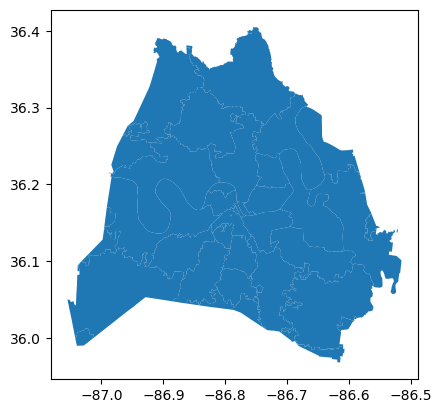

In [9]:
zipcodes.plot()

In [10]:
leg_kwds = {'title': 'ZIP codes', 'loc':'upper left',
            'bbox_to_anchor': (1,1.03), 'ncol':2}

zipcodes.plot(column = 'zipcode', figsize(10,10),
              edgecolor = 'black',
              legend = True, legend_kwds = leg_kwds,
              cmap = 'Greens')
plt.show()

SyntaxError: positional argument follows keyword argument (295675557.py, line 7)